퍼셉트론 규칙은 머신 러닝 분류 알고리즘을 배우기에 간단하고 좋은 모델이지만 가장 큰 단점은 클래스가 선형적으로 구분되지 않을 때 수렴 할수 없다는것, 분류 작업이 그런예이다. 에포크마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치 업데이트가 끝도 없이 계속된다. 물론 학습률을 바꾸거나 에포크 횟수를 늘릴 수 있지만 퍼셉트론은 이 데이터셋에 절대 수렴하지 못한다.
#### 간단하지만 선형 이진 분류 문제에 다른 알고리즘인 로지스틱 회귀( logistic regression)은 회귀가 아니라 분류 모델이다.

구현하기 매우 쉽고 선형적응로 구분되는 클래스에 뛰어난 성능을 내는 분류 모델, 이진 분류르 위한 서너형 모델이지만 다중 분류로 확장할 수 있다.
#### 오비즈(odds ratio)는 로지스틱 회귀 모델 이면에 있는 아이디어를  설명하기 전에 필요하다
오즈는 특정 사건이 발생할 확률이다 P/(1-P)처럼 쓰임. P는 양성 샘플일 확률이다. 양성 샘플은 좋을 것을 의미하지 않고 예측하려는 대상을 말한다. 오즈비에 로그 함수(로그 오즈)를 취해 로짓함수를 정의.

# sigmoid(시그모이드): 확률을 예측할 때 사용하는 S자형 활성화 함수

In [1]:
import matplotlib.pyplot as plt
import numpy as np

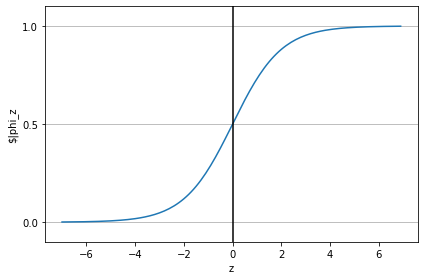

In [31]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$|phi_z')
plt.yticks([0.0,0.5,1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

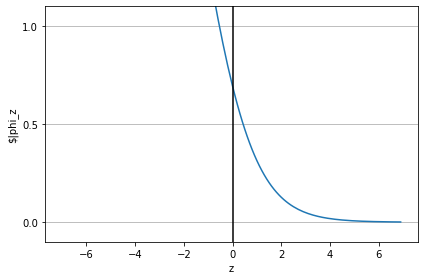

In [3]:
def sigmoid(z):
    return -np.log(1.0/(1.0+np.exp(-z)))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$|phi_z')
plt.yticks([0.0,0.5,1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

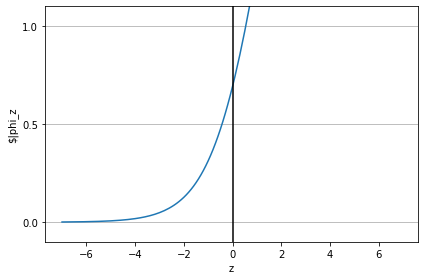

In [4]:
def sigmoid(z):
    return -np.log(1-(1.0/(1.0+np.exp(-z))))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$|phi_z')
plt.yticks([0.0,0.5,1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### 로지스틱 비용 함수의 가중치 학습
로그 가능 함수하는 이유:
   1. 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(unberflow)를 미연에 방지
   2. 계수의 곱을 계수의 합으로 바꿀 수 있다. 
#### 경사 하강법 같은 최적화 알고리즘을 사용하여 로그 가능도 함수를 최대화 할 수 있다.
#### 로그 가능도 함수를 다시 비용 함수로 표현하여 경사 하강법을 최소화 할 수 있다.

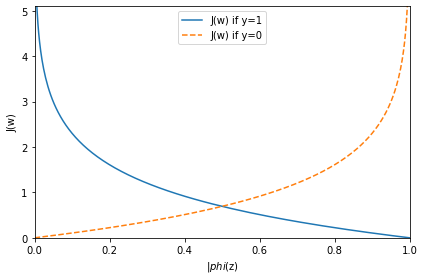

In [32]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))
z=np.arange(-10,10,0.1)
phi_z=sigmoid(z)
c1=[cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0=[cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$|phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지는 것을 볼 수 있다.

클래스 0에 속한 샘플을 정확히 예측하면 y축의 비용이 0에 가까워진다. 예측이 잘못되면 비용이 무한대가 된다. 

# 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [6]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler# 최상의 성능을 위해 특성 스케일 조정이 필요하다
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [9]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train,y_test))

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [11]:
#이 로지스틱 모델은 이진 분류 문제에만 적용가능
class LogisticRegreesionGD(object):
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_=[]

        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()

            cost=(-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))# 오차 제곱합 대신 로지스틱 비용을 계산
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self,z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)

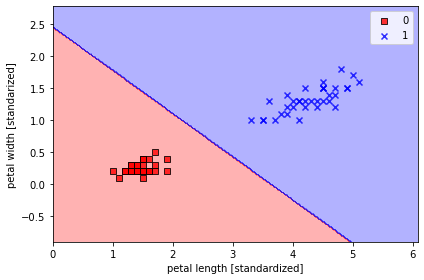

In [12]:
X_train_01_subset=X_train[(y_train==0) | (y_train==1)]
y_train_01_subset=y_train[(y_train==0) | (y_train==1)]

lrgd=LogisticRegreesionGD(eta=0.05,n_iter=1000,random_state=1)

lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

<ipython-input-10-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


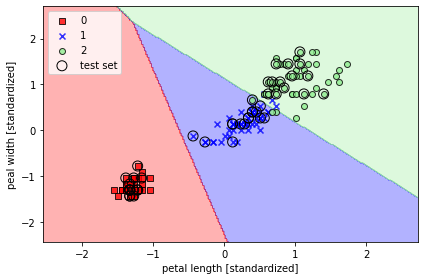

In [14]:
lr=LogisticRegression(solver='liblinear',multi_class='auto',C=100.0,random_state=1)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('peal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
lr.predict_proba(X_test_std[:3,:])# predict_proba: 각 클래스에 대한 확률

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

https://subinium.github.io/MLwithPython-2-4/

In [16]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [17]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

# 규제를 사용하여 과대적합 피하기

과대적합: 모델이 훈련 데이터로는 잘 동작하지만 본 적 없는 데이터(테스트 데이터)로는 잘 일반화 되지 않는 현상- 분산이 크다라고 말한다. 모델 파라미터가 너무 많아 주어진 데이터에서 너무 복잡한 모델이기 때문

과소적합: 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않는것을 의미, 새로운 데이터에서도 성능이 낮을 것

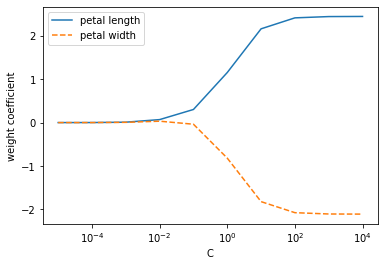

In [19]:
weights, params=[] ,[]
for c in np.arange(-5,5):
    lr=LogisticRegression(solver='liblinear',multi_class='auto',C=10.**c,random_state=1)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# 서포트 벡터 머신을 이용한 최대 마진 분류
퍼셉트론 알고리즘을 사용하여 분류 오차를 최소화했고,

서포트 벡터 머신(Support Vector Machine, SVM)은 최적화 대상은 마진을 최대화하는 것,

마진 클래스를구분하면 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의

# 최대 마진
큰 마진의 결정 경계를 원하는 이유: 일반화 오차가 낮아지는 경향이 있기때문.

반면에 작은 마진은 모델의 과대적합되기쉽다.


# 슬랙변수를 사용하여 비선형 분류 문제다루기

소프트 마진 분류(softmargin classification)

슬랙변수는 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입

<ipython-input-10-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


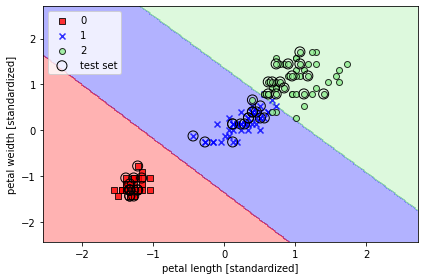

In [28]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal weidth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

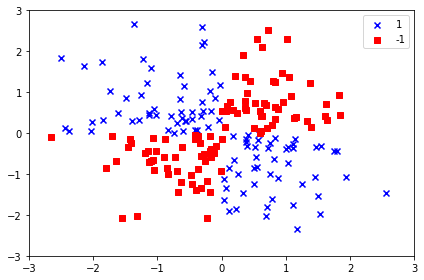

In [36]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)

y_xor=np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

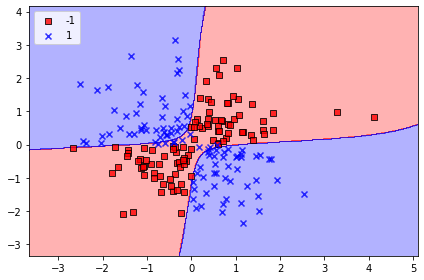

In [40]:
svm=SVC(kernel='rbf',random_state=1,gamma=0.10, C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


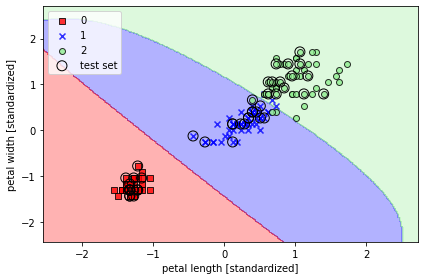

In [41]:
svm=SVC(kernel='rbf',random_state=1,gamma=0.2, C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-10-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


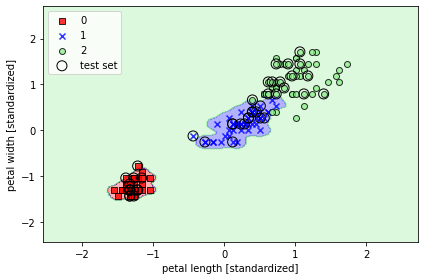

In [42]:
svm=SVC(kernel='rbf',random_state=1,gamma=100, C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()